In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge


In [2]:
train_data = pd.read_csv("/Users/rohanshenoy/Downloads/Admission_Predict_Ver1.1.csv")
train_data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
# Display column names to identify the correct names
print(train_data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [4]:
# The hypothesis
def h(x, theta):
    return np.dot(x, theta)

# The cost function
def J(X, y, theta):
    m = len(X)
    c = 1 / (2 * m)
    temp_0 = h(X, theta) - y.reshape(-1)
    temp_1 = temp_0.transpose()
    temp_2 = np.dot(temp_1, temp_0)
    return c * temp_2

# Gradient descent function
def gradient(X, y, theta, alpha):
    m = len(X)
    c = alpha / m
    temp_0 = X.transpose()
    temp_1 = h(X, theta) - y.reshape(-1)
    temp_2 = np.dot(temp_0, temp_1)
    return theta - (c * temp_2)

# Normalization and Standardization
def normalize(X, columns):
    for column in columns:
        X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())
    return X

In [5]:
# Set X and y
X = train_data.drop(['Chance of Admit ', 'Serial No.'], axis=1)
y = pd.DataFrame(data=train_data['Chance of Admit ']).to_numpy()

# Select columns to be scaled
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

# Min-max scaling
X = normalize(X, columns)

# Instead of finding probabilities, we want to calculate the percentages.
y = y * 100

# dividing the dataset into training and testing/validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [6]:
# Adding Polynomial Features
poly = PolynomialFeatures(degree=13) #using a very high value to get better accuracy,and as it is not overfitting
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)


In [7]:
# Initialize Ridge Regression
alpha = 0.25  # Regularization strength
ridge_reg = Ridge(alpha=alpha)

# Fit the model
ridge_reg.fit(X_train_poly, y_train)


Ridge(alpha=0.25)

In [8]:
# Predict on training and validation sets
y_train_pred = ridge_reg.predict(X_train_poly)
y_valid_pred = ridge_reg.predict(X_valid_poly)

In [9]:
# Calculate and display the R² score for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_valid, y_valid_pred)

print("R² score for training data: {}".format(r2_train))
print("R² score for testing data: {}".format(r2_test))

R² score for training data: 0.8906871768936437
R² score for testing data: 0.7429492945200777


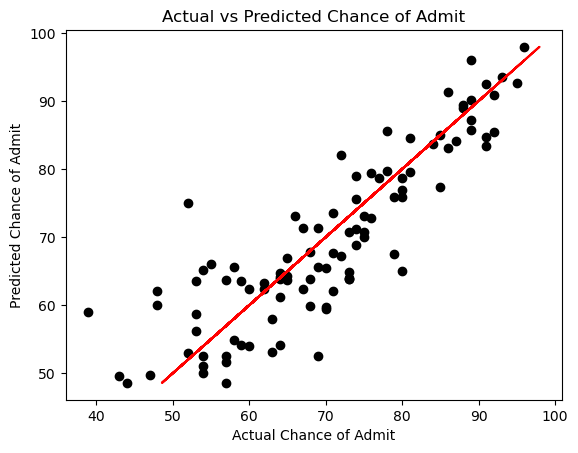

In [10]:
# Scatter plot
plt.scatter(y_valid, y_valid_pred, color="black")
plt.plot(y_valid_pred, y_valid_pred, color="red")
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Chance of Admit")
plt.show()